<a href="https://colab.research.google.com/github/anuragverse/ML-Workshop/blob/main/Audio_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tempo:[117.45383523]BPM
Beat times: [ 0.06965986  0.44117914  0.92879819  1.43963719  1.95047619  2.43809524
  2.92571429  3.43655329  3.94739229  4.43501134  4.92263039  5.43346939
  5.94430839  6.43192744  6.94276644  7.43038549  7.94122449  8.42884354
  8.93968254  9.45052154  9.93814059 10.42575964 10.93659864 11.42421769
 11.93505669 12.39945578 12.93351474 13.44435374 13.93197279 14.44281179
 14.93043084 15.41804989 15.92888889 16.43972789 16.92734694 17.43818594
 17.94902494 18.43664399 18.94748299 19.43510204 19.94594104 20.43356009
 20.92117914 21.43201814 21.94285714 22.45369615 22.94131519 23.42893424
 23.93977324 24.42739229 24.93823129 25.44907029 25.93668934 26.42430839
 26.93514739 27.44598639 27.93360544 28.42122449]


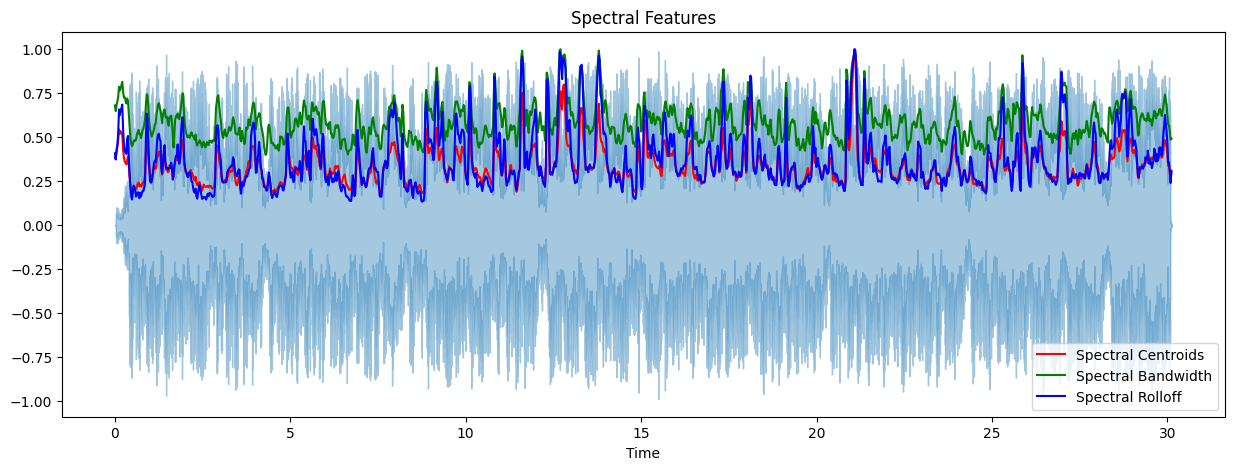

In [10]:
from IPython import get_ipython
from IPython import display

!pip install librosa numpy matplotlib scikit-learn
import librosa
import numpy as np
import matplotlib.pyplot as plt
audio_path='/content/Night Changes.mpeg'
y,sr=librosa.load(audio_path)
mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13)
tempo, beat_times=librosa.beat.beat_track(y=y,sr=sr)
beat_times = librosa.frames_to_time(beat_times, sr=sr)
print(f'Tempo:{tempo}BPM')
print('Beat times:',beat_times)

spectral_centroids=librosa.feature.spectral_centroid(y=y,sr=sr)[0]
spectral_bandwidth=librosa.feature.spectral_bandwidth(y=y,sr=sr)[0]
spectral_rolloff=librosa.feature.spectral_rolloff(y=y,sr=sr)[0]

frames=range(len(spectral_centroids))
t=librosa.frames_to_time(frames,sr=sr)

plt.figure(figsize=(15,5))
librosa.display.waveshow(y,sr=sr, alpha=0.4)
plt.plot(t, librosa.util.normalize(spectral_centroids),color='r',label='Spectral Centroids')
plt.plot(t, librosa.util.normalize(spectral_bandwidth),color='g',label='Spectral Bandwidth')
plt.plot(t, librosa.util.normalize(spectral_rolloff),color='b',label='Spectral Rolloff')
plt.legend()
plt.title('Spectral Features')
plt.show()